## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import Normalizer

## Agglomerative Hierarchical Clustering

### Read File

In [2]:
data = pd.read_csv('data.csv')
numeric_data = data[['acousticness', 'danceability', 'energy', 'duration_ms', 'instrumentalness', 'valence','popularity', 'tempo', 'liveness', 'loudness', 'speechiness', 'year']]
print(numeric_data)


        acousticness  danceability  energy  duration_ms  instrumentalness  \
0             0.9950         0.708  0.1950       158648          0.563000   
1             0.9940         0.379  0.0135       282133          0.901000   
2             0.6040         0.749  0.2200       104300          0.000000   
3             0.9950         0.781  0.1300       180760          0.887000   
4             0.9900         0.210  0.2040       687733          0.908000   
...              ...           ...     ...          ...               ...   
169904        0.1730         0.875  0.4430       163800          0.000032   
169905        0.0167         0.719  0.3850       167468          0.031300   
169906        0.5380         0.514  0.5390       180700          0.002330   
169907        0.0714         0.646  0.7610       167308          0.000000   
169908        0.1090         0.512  0.4280       214787          0.000000   

        valence  popularity    tempo  liveness  loudness  speechiness  year

### Find Correlation Between Numeric Features

          0         1         2         3         4         5         6   \
0   1.000000  0.502724 -0.012530 -0.402338  0.515615  0.442878 -0.197692   
1   0.502724  1.000000  0.421722 -0.313324  0.192839  0.784395  0.228560   
2  -0.012530  0.421722  1.000000 -0.251296  0.092523  0.495809  0.439917   
3  -0.402338 -0.313324 -0.251296  1.000000 -0.267635 -0.269710 -0.039717   
4   0.515615  0.192839  0.092523 -0.267635  1.000000  0.210624 -0.110285   
5   0.442878  0.784395  0.495809 -0.269710  0.210624  1.000000  0.140440   
6  -0.197692  0.228560  0.439917 -0.039717 -0.110285  0.140440  1.000000   
7   0.560085  0.680592  0.467625 -0.345277  0.336991  0.662634  0.204969   
8   0.432764  0.399927  0.389374 -0.335385  0.221697  0.377061  0.036624   
9  -0.627916 -0.437942 -0.006778  0.797216 -0.427799 -0.329135  0.058269   
10  0.233245  0.527509  0.143524 -0.192891  0.005622  0.340234 -0.039296   
11  0.724428  0.743149  0.463686 -0.691548  0.444641  0.644403  0.180081   

          7

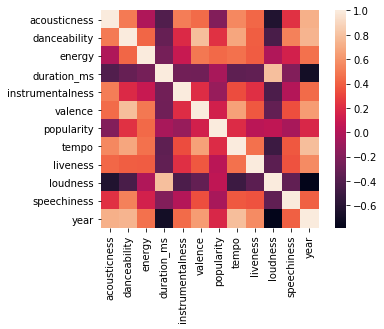

In [3]:
cor = pd.DataFrame(Normalizer().fit_transform(numeric_data)).corr(method='pearson')
labels = ['acousticness', 'danceability', 'energy', 'duration_ms', 'instrumentalness', 'valence','popularity', 'tempo', 'liveness', 'loudness', 'speechiness', 'year']
sns.heatmap(cor, square = True, yticklabels=labels, xticklabels=labels)
print(cor)

TODO: Interpret results here (e.g. The highest correlation exists between Beats.Per.Minute and Length.)

### Cluster Data and Plot Dendrogram

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [100.0, 100.0, 140.0, 140.0],
  [40.0, 40.0, 120.0, 120.0]],
 'dcoord': [[0.0, 1539097.658435055, 1539097.658435055, 0.0],
  [0.0, 1974888.0823196683, 1974888.0823196683, 0.0],
  [1539097.658435055,
   4781176.932461055,
   4781176.932461055,
   1974888.0823196683],
  [0.0, 2405583.595175806, 2405583.595175806, 0.0],
  [0.0, 3265934.6967208637, 3265934.6967208637, 0.0],
  [2405583.595175806,
   6358945.457951159,
   6358945.457951159,
   3265934.6967208637],
  [4781176.932461055,
   10616440.162370946,
   10616440.162370946,
   6358945.457951159],
  [0.0, 1159774.3247657244, 1159774.3247657244, 0.0],


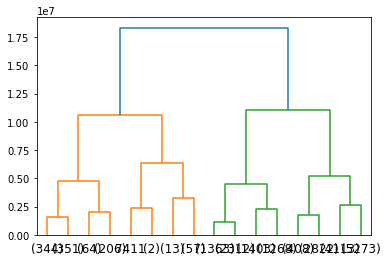

In [28]:
# I am only using first 20,000 values for clustering as going higher causes a memory allocation error. In the final part we should probably run it locally with all values but it will take a very long time as a warning.
# Also, this code is just to display the dendogram visualization. The real clustering occurs in the next box.

clustering = linkage(numeric_data[:20000], method='ward')
dendrogram(clustering, truncate_mode='level', p=3)

### Visualization of Clusters

[0 0 0 ... 0 0 0]


Text(0, 0.5, 'loudness')

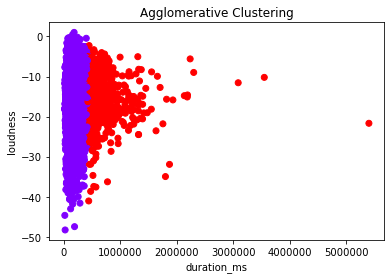

In [29]:
# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(numeric_data[:20000])
print(clustering.labels_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(numeric_data['duration_ms'][:20000], numeric_data['loudness'][:20000], c=clustering.labels_, cmap='rainbow')
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('duration_ms')
ax.set_ylabel('loudness')

In [30]:
# This code might be obselete now as the new dataset does not have 'genre', but I will leave it for now.

def word_count(words):
    counts = dict()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

for i in range(max(clustering.labels_) + 1):
    c = np.argwhere(clustering.labels_ == i)
    genres = word_count(np.squeeze(data[[c]][:,:,3]))
    genres = {k: v for k, v in sorted(genres.items(), key=lambda item: item[1], reverse=True)}
    print('Cluster ', i + 1, ':\n', genres, '\n')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('Cluster ' + str(i + 1) + ' Frequency')
    ax.set_xlabel('Genre')
    ax.set_ylabel('Frequency')
    ax.bar(genres.keys(), genres.values())
    plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')

ValueError: Index data must be 1-dimensional